In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''
import pandas as pd

#df = pd.read_excel("GnP_data_#1d8.#1_v3.xlsx")
df = pd.read_excel("GnP_data_#1d15_v1.xlsx")
print(df.shape)
df.head()
'''

'\nimport pandas as pd\n\n#df = pd.read_excel("GnP_data_#1d8.#1_v3.xlsx")\ndf = pd.read_excel("GnP_data_#1d15_v1.xlsx")\nprint(df.shape)\ndf.head()\n'

In [4]:
#df.columns

In [5]:
'''
#重複データの削除
df.drop_duplicates() 
#重複が存在しないので数は変わらないはず
print(df.shape) 
#欠損状態確認、無いなら2へ
df.isnull().sum()
'''

'\n#重複データの削除\ndf.drop_duplicates() \n#重複が存在しないので数は変わらないはず\nprint(df.shape) \n#欠損状態確認、無いなら2へ\ndf.isnull().sum()\n'

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import datetime
import os

In [7]:
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る

In [8]:
iris = datasets.load_iris()

x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

In [9]:
#xが説明変数
#x = df.drop('target', axis=1)

#yが目的変数
#y = df['target']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

・fold1_start
AUC 0.8958333333333333
accuracy: 0.9
precision: 0.9166666666666666
recall: 0.9166666666666666
f1_score: 0.9166666666666666
finish

・fold2_start
AUC 0.9500000000000001
accuracy: 0.95
precision: 0.9090909090909091
recall: 1.0
f1_score: 0.9523809523809523
finish

・fold3_start
AUC 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
finish

・fold4_start
AUC 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
finish

・fold5_start
AUC 0.9615384615384616
accuracy: 0.95
precision: 0.875
recall: 1.0
f1_score: 0.9333333333333333
finish



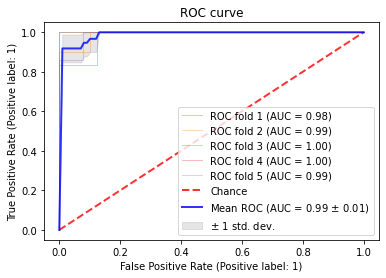

以下、平均スコア
平均AUC 0.961474358974359
平均accuracy 0.96
平均precision 0.9401515151515152
平均recall 0.9833333333333332
平均F1 0.9604761904761905
/content/logistic_20221219_050605.txt


In [10]:
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "logistic"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
#i = 0

#条件設定
for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #このモデル部分を変更する
    model = LogisticRegression(class_weight='balanced')
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    proba_y = model.predict_proba(test_x)[: , 1]
    viz = plot_roc_curve(model, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print('・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')
    #fpr, tpr, thresholds = roc_curve(test_y, proba_y)
    #roc_auc = roc_auc_score(test_y, proba_y)
    #aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    #i=+1

now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
plt.savefig(na +"_ROC.png", format="png")
plt.show()

print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()


logistic

{'C': 1, 'random_state': 0}
logistic・fold1_start
AUC 0.8541666666666667
accuracy: 0.85
precision: 0.9090909090909091
recall: 0.8333333333333334
f1_score: 0.8695652173913043
finish



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'C': 1, 'random_state': 0}
logistic・fold2_start
AUC 0.9500000000000001
accuracy: 0.95
precision: 0.9090909090909091
recall: 1.0
f1_score: 0.9523809523809523
finish



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'C': 1, 'random_state': 0}
logistic・fold3_start
AUC 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
finish



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'C': 1, 'random_state': 0}
logistic・fold4_start
AUC 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
finish



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'C': 1, 'random_state': 0}
logistic・fold5_start
AUC 0.9615384615384616
accuracy: 0.95
precision: 0.875
recall: 1.0
f1_score: 0.9333333333333333
finish



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


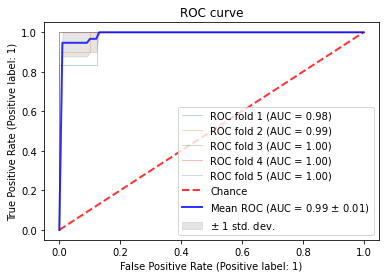

以下、平均スコア
平均AUC 0.9531410256410255
平均accuracy 0.95
平均precision 0.9386363636363637
平均recall 0.9666666666666668
平均F1 0.951055900621118
/content/logistic_20221216_103701.txt


In [ ]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "logistic"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
#i = 0

#条件設定
max_score = 0
SearchMethod = 0
LR_grid = {LogisticRegression(): {"C": [10 ** i for i in range(-5, 6)], "random_state": [i for i in range(0, 101)]}}
#LR_random = {LogisticRegression(): {"C": scipy.stats.uniform(0.00001, 1000),"random_state": scipy.stats.randint(0, 100)}}

for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #このモデル部分を変更する
    for model, param in LR_grid.items():
      clf = GridSearchCV(model, param)
      clf.fit(train_x, train_y)
      pred_y = clf.predict(test_x)
      score = f1_score(test_y, pred_y, average="micro")

      if max_score < score:
          max_score = score
          best_param = clf.best_params_
          best_model = model.__class__.__name__
    print(best_param)

    clf = LogisticRegression(C = best_param['C'], random_state = best_param['random_state'])
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()

Neural Net

In [ ]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "Neural_Net"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()


for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    clf = MLPClassifier()
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()

KNN

ストリーミング出力は最後の 5000 行に切り捨てられました。
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 64, n_neighbors = 83

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_

{'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
KNN・fold1_start
AUC 0.8541666666666667
accuracy: 0.85
precision: 0.9090909090909091
recall: 0.8333333333333334
f1_score: 0.8695652173913043
finish



ストリーミング出力は最後の 5000 行に切り捨てられました。
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 64, n_neighbors = 83

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
KNN・fold2_start
AUC 0.9
accuracy: 0.9
precision: 0.9
recall: 0.9
f1_score: 0.9
finish



ストリーミング出力は最後の 5000 行に切り捨てられました。
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 64, n_neighbors = 83

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
KNN・fold3_start
AUC 0.95
accuracy: 0.95
precision: 1.0
recall: 0.9
f1_score: 0.9473684210526316
finish



ストリーミング出力は最後の 5000 行に切り捨てられました。
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 64, n_neighbors = 83

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
KNN・fold4_start
AUC 1.0
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
finish



ストリーミング出力は最後の 5000 行に切り捨てられました。
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 64, n_neighbors = 83

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
KNN・fold5_start
AUC 0.9615384615384616
accuracy: 0.95
precision: 0.875
recall: 1.0
f1_score: 0.9333333333333333
finish



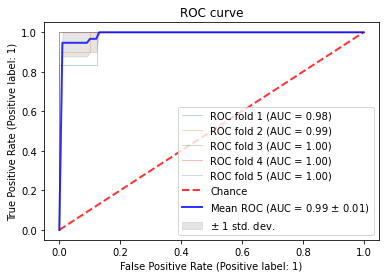

以下、平均スコア
平均AUC 0.9331410256410256
平均accuracy 0.93
平均precision 0.9368181818181818
平均recall 0.9266666666666665
平均F1 0.9300533943554539
/content/KNN_20221219_074441.txt


In [16]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "KNN"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#条件設定
max_score = 0
SearchMethod = 0
knn_grid = {KNeighborsClassifier(): {'n_neighbors':[i for i in range(1, 100)],
                              'weights':['uniform','distance'],
                              'p':[1,2]}}

for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #suitable_k_search
    #このモデル部分を変更する
    for model, param in tqdm(knn_grid.items()):
      clf = GridSearchCV(model, param)
      clf.fit(train_x, train_y)
      pred_y = clf.predict(test_x)
      score = f1_score(test_y, pred_y, average="micro")

      if max_score < score:
          max_score = score
          best_param = clf.best_params_
          best_model = model.__class__.__name__
    print(best_param)
    clf = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'],
                               weights = best_param['weights'],
                               p = best_param['p'])

    #clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()

Decision Tree

In [ ]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "KNN"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#条件設定
max_score = 0
SearchMethod = 0
DTC_grid = {DecisionTreeClassifier(): {"criterion": ["gini", "entropy"],
                                       "splitter": ["best", "random"],
                                       "max_depth": [i for i in range(1, 11)],
                                       "min_samples_split": [i for i in range(2, 11)],
                                       "min_samples_leaf": [i for i in range(1, 11)],
                                       "random_state": [i for i in range(0, 101, 10)]
                                      }}

for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #このモデル部分を変更する
    for model, param in tqdm(DTC_grid.items()):
      clf = GridSearchCV(model, param)
      clf.fit(train_x, train_y)
      pred_y = clf.predict(test_x)
      score = f1_score(test_y, pred_y, average="micro")

      if max_score < score:
          max_score = score
          best_param = clf.best_params_
          best_model = model.__class__.__name__
    print(best_param)
    clf = DecisionTreeClassifier(criterion = best_param['criterion'],
                                 splitter = best_param['splitter'],
                                 max_depth = best_param['max_depth'],
                                 min_samples_split = best_param['min_samples_split'],
                                 min_samples_leaf = best_param['min_samples_leaf'],
                                 random_state = best_param['random_state'])

    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()

  0%|          | 0/1 [00:00<?, ?it/s]

Random Forest

In [ ]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "KNN"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#条件設定
max_score = 0
SearchMethod = 0
RFC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range(1, 21)],
                                       "criterion": ["gini", "entropy"],
                                       "max_depth":[i for i in range(1, 5)],
                                       "random_state": [i for i in range(0, 101)]
                                      }}

for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #このモデル部分を変更する
    for model, param in tqdm(RFC_grid.items()):
      clf = GridSearchCV(model, param)
      clf.fit(train_x, train_y)
      pred_y = clf.predict(test_x)
      score = f1_score(test_y, pred_y, average="micro")

      if max_score < score:
          max_score = score
          best_param = clf.best_params_
          best_model = model.__class__.__name__
    print(best_param)
    clf = DecisionTreeClassifier(n_estimators = best_param['n_estimators'],
                                 criterion = best_param['criterion'],
                                 max_depth = best_param['max_depth'],
                                 random_state = best_param['random_state'])

    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()

GradientBoostingClassifier

In [ ]:
#データも書き換える
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
x = iris_df.drop('species', axis=1)
y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

#グリッドサーチ
kf = KFold(n_splits=5, shuffle=True, random_state=1)
name = "KNN"

auc_ = []
accuracy = []
precision = []
recall = []
f1 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#条件設定
max_score = 0
SearchMethod = 0
GBC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range((20, 101, 10)],
                                      "learning_rate": list(np.arange(0.05, 0.20, 0.01)),
                                       "max_depth":[i for i in range(3, 7)],
                                       "min_samples_split":[i for i in range(3, 7)]}}

for i, (train_index, test_index) in enumerate(kf.split(x)):
    train_x = x.iloc[train_index]
    test_x  = x.iloc[test_index]
    train_y = y.iloc[train_index]
    test_y  = y.iloc[test_index]

    #suitable_k_search
    #このモデル部分を変更する
    for model, param in tqdm(GBC_grid.items()):
      clf = GridSearchCV(model, param)
      clf.fit(train_x, train_y)
      pred_y = clf.predict(test_x)
      score = f1_score(test_y, pred_y, average="micro")

      if max_score < score:
          max_score = score
          best_param = clf.best_params_
          best_model = model.__class__.__name__
    print(best_param)
    clf = DecisionTreeClassifier(n_estimators = best_param['n_estimators'],
                                 learning_rate = best_param['learning_rate'],
                                 max_depth = best_param['max_depth'],
                                 min_samples_split = best_param['min_samples_split'])

    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    proba_y = clf.predict_proba(test_x)[: , 1]


    viz = plot_roc_curve(clf, test_x, test_y, 
                         name='ROC fold {}'.format(i+1), 
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    #フォールドごとの各スコア算出
    print(name+'・fold'+str(i+1)+'_start')
    score = roc_auc_score(test_y, pred_y)
    auc_.append(score)
    print('AUC' ,score)
    acc = accuracy_score(test_y, pred_y)
    accuracy.append(acc)
    print('accuracy:', acc)
    pre = precision_score(test_y, pred_y)
    precision.append(pre)
    print('precision:', pre)
    rec = recall_score(test_y, pred_y)
    recall.append(rec)
    print('recall:', rec)
    f = f1_score(test_y, pred_y)
    f1.append(f)
    print('f1_score:', f)
    print('finish\n')

#このままだとcwdがpathになってるので、statisticsに書き換えること
now = datetime.datetime.now()
path = os.getcwd()
na =  name + "_" + now.strftime('%Y%m%d_%H%M%S')
filename = path + "/" + na + '.txt'

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#ここからコピペ
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve")
ax.legend(loc="lower right")
#このままだとcwdがpathになってるので、statisticsに書き換えること
plt.savefig(na +"_ROC.png", format="png")
plt.show()


print('以下、平均スコア')
print('平均AUC',np.mean(auc_))
print('平均accuracy',np.mean(accuracy))
print('平均precision',np.mean(precision))
print('平均recall',np.mean(recall))
print('平均F1',np.mean(f1))

print(filename)
with open(filename, mode='w') as f:
    f.write('以下、平均スコア\n')
    f.write('平均AUC '+str(np.mean(auc_))+"\n")
    f.write('平均accuracy '+str(np.mean(accuracy))+"\n")
    f.write('平均precision '+str(np.mean(precision))+"\n")
    f.write('平均recall '+str(np.mean(recall))+"\n")
    f.write('平均F1 '+str(np.mean(f1))+"\n")
    f.close()